In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1) Use the analytical solution to OLS on the data from HW1, to estimate the weight ofeach exam on the final grade:

In [2]:
data = np.array([[89,93,83,88],
                 [100,86,78,86],
                 [97,90,88,91],
                 [83,99,100,96],
                 [100,81,75,83]])
df = pd.DataFrame(data, columns = ['Exam 1','Exam 2','Exam 3','Final Grade'], 
                      index = ['Student {}'.format(i) for i in range(1,6)])
df

,Exam 1,Exam 2,Exam 3,Final Grade
Student 1,89,93,83,88
Student 2,100,86,78,86
Student 3,97,90,88,91
Student 4,83,99,100,96
Student 5,100,81,75,83


In [3]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$

In [4]:
b = np.linalg.inv(X.T @ X) @ X.T @ y
b

array([0.23083893, 0.33911109, 0.43272626])

In [5]:
X @ b #should be equal to y

array([87.99827582, 86.00009513, 90.99128528, 96.00425515, 83.0063609 ])

In [6]:
(X @ b).round() == y

array([ True,  True,  True,  True,  True])

In [7]:
weights = np.array([b[0], b[1], b[2]]).reshape(1,3)
df_weights = pd.DataFrame(weights, columns = ['Exam 1', 'Exam 2', 'Exam 3'], index = ['Weights'])
df_weights

,Exam 1,Exam 2,Exam 3
Weights,0.230839,0.339111,0.432726


We know that formula is, $$Final Grade = \hat{\beta}_1Exam1 + \hat{\beta}_2Exam2 + \hat{\beta}_3Exam3$$

In [8]:
predicted_FinalGrades = np.array([df.iloc[i,0] * b[0] + df.iloc[i,1] * b[1] + df.iloc[i,2] * b[2] for i in range(0,5)])

concat_true_predicted = np.concatenate((y.reshape(5,1), predicted_FinalGrades.reshape(5,1)), axis = 1)
df_true_predicted = pd.DataFrame(concat_true_predicted, columns = ['True Final grade', 'Predicted Final grade'],
                            index = ['Student {}'.format(i) for i in range(1,6)])
df_true_predicted

,True Final grade,Predicted Final grade
Student 1,88.0,87.998276
Student 2,86.0,86.000095
Student 3,91.0,90.991285
Student 4,96.0,96.004255
Student 5,83.0,83.006361


Last retouchings, i.e, rounding the values:

In [9]:
df_true_predicted['Predicted Final grade'] = df_true_predicted['Predicted Final grade'].round()
df_true_predicted

,True Final grade,Predicted Final grade
Student 1,88.0,88.0
Student 2,86.0,86.0
Student 3,91.0,91.0
Student 4,96.0,96.0
Student 5,83.0,83.0


### 2) Use the same data, but now find the weights using gradient descent. Guidance:

In [10]:
from tqdm import tqdm

100%|██████████| 160000/160000 [00:02<00:00, 67925.21it/s]


The last 5 values of error [0.0001375 0.0001375 0.0001375 0.0001375 0.0001375 0.0001375 0.0001375
 0.0001375 0.0001375 0.0001375]

The weights that were found with gradient descend are [0.23083893 0.33911109 0.43272626]


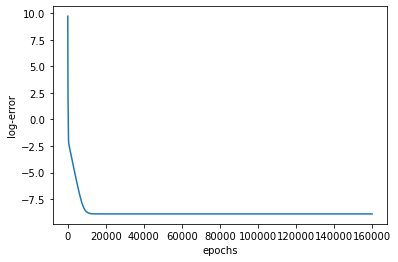

In [13]:
epochs = 160000 #a---> number of epochs
step_size = 8e-6 # d---> the least value I could come up with while playing with numbers
error_history = [] #empty list to collect the values of errors

def OLS_gradient_descent(X, y, step_size, termination_crieria):
    a = np.random.random(3) #three initial random values for a as test values for exam weights
    for i in tqdm(range(termination_crieria)):
        error = np.sum(np.square(a.T @ X.T - y.T)) #b--->calculating the error
        error_history.append(np.log(error)) #adding current error to array
        current_gradient = 2 * (a.T @ X.T - y.T) @ X #calculating current gradient
        a = a - step_size * current_gradient #calculating the weights with using current-gradient and step size
    print("The last 5 values of error {}\n".format(np.exp(error_history[-10:])))
    plt.xlabel("epochs")
    plt.ylabel("log-error")
    plt.plot(np.arange(epochs), error_history) #c---> ploting the error
    print("The weights that were found with gradient descend are {}".format(a))

OLS_gradient_descent(X, y, step_size, termination_crieria=epochs)

We may observe that the errors(the last 10 error values in the array) are no greater than 0.001375. It means that our gradient descent algorithm is correct and the errors are negligibly small.

### 3) Examine what happens to the gradient descent algorithm with different step sizes.Write a short summary of your conclusions.

The best step size I could find is $10^{-6} <= step size <= 8*10^{-6}$  . I tested several values, in higher from this values the gradients will be exploded, and it will give us nan values, and lower than this values will take a lot of time to convergence. That is why in my opinion, step sized from given interval is best to use in this gradient descend algorithm